# Dimensionality Reduction with PCA

##### Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_absolute_error, confusion_matrix, accuracy_score
import numpy as np

##### Importing the data

In [2]:
data = pd.read_csv('C:/Users/Nicolas/Documents/Scraping/thecarconnection/full_dataset.csv', 
                 index_col=0).sample(frac=1, random_state=42).reset_index(drop=True)
dataset = data.copy()

Taking a peek at the data

In [3]:
data.drop(['Style Name', 'Body Style', 'EPA Classification', 'Drivetrain'], axis=1).head()

,MSRP,Make,Model,Passenger Capacity,Passenger Doors,Front Shoulder Room (in),Front Head Room (in),Second Leg Room (in),Front Leg Room (in),Second Shoulder Room (in),...,Rear Wheel Size,Front Wheel Size,Tire Rating,Tire Width Ratio,Wheel Size Ratio,Tire Ratio,Year,Country,Country Code,Category
0,30034.0,GMC,Sierra 2500HD,6.0,2.0,65.2,41.0,33.7,41.30,66.3,...,16.0,16.0,R,1.0,1.0,7.0,2002.0,USA,6.0,Pickup
1,19515.0,Ford,Ranger,5.0,2.0,54.5,39.2,39.1,42.40,40.0,...,15.0,15.0,R,1.0,1.0,7.0,2010.0,USA,6.0,Pickup
2,24595.0,Subaru,Outback,5.0,4.0,56.3,40.8,37.8,43.00,56.1,...,17.0,17.0,R,1.0,1.0,6.0,2010.0,Japan,2.0,Car
3,56600.0,Porsche,Cayenne,5.0,4.0,58.9,39.6,36.0,41.86,56.7,...,18.0,18.0,V,1.0,1.0,5.0,2014.0,Germany,0.0,SUV
4,21795.0,Mazda,CX-5,5.0,4.0,57.5,40.1,39.3,41.00,55.5,...,17.0,17.0,H,1.0,1.0,6.0,2016.0,Japan,2.0,SUV


In [4]:
data.shape

(31237, 81)

31,237 rows and 81 columns


## Preprocessing

##### Making sure the data is balanced

In [5]:
data['EPA Classification'].value_counts().head(10)

None             10555
Compact           4089
Midsize           3585
SUV 4WD           2150
Subcompact        1762
Large             1626
SUV 2WD           1285
Small SUV 4WD     1258
Two Seater        1067
Small SUV 2WD      881
Name: EPA Classification, dtype: int64

In [6]:
suv_awd = data.loc[data['EPA Classification'] == 'SUV 4WD'].sample(n=1000)
midsized_car = data.loc[data['EPA Classification'] == 'Midsize'].sample(n=1000)
compact_car = data.loc[data['EPA Classification'] == 'Compact'].sample(n=1000)
subcompact_car = data.loc[data['EPA Classification'] == 'Subcompact'].sample(n=1000)
large_car = data.loc[data['EPA Classification'] == 'Large'].sample(n=1000)
suv_2wd = data.loc[data['EPA Classification'] == 'SUV 2WD'].sample(n=1000)
small_suv_4wd = data.loc[data['EPA Classification'] == 'Small SUV 4WD'].sample(n=1000)
two_seater = data.loc[data['EPA Classification'] == 'Two Seater'].sample(n=1000)

In [7]:
df = pd.concat([suv_awd, compact_car, midsized_car, subcompact_car, large_car, suv_2wd, small_suv_4wd, two_seater], 
               axis=0, sort=False).sample(frac=1)

##### Separating the `x` and `y`

In [8]:
X = df.loc[:, ['Drivetrain', 'Passenger Capacity', 'Passenger Doors', 'Body Style',
       'EPA Classification', 'Front Shoulder Room (in)',
       'Front Head Room (in)', 'Second Leg Room (in)', 'Front Leg Room (in)',
       'Second Shoulder Room (in)', 'Second Head Room (in)',
       'Height, Overall (in)', 'Wheelbase (in)', 'Width, Max w/o mirrors (in)',
       'Fuel Tank Capacity, Approx (gal)', 'EPA Fuel Economy Est - Hwy (MPG)',
       'EPA Fuel Economy Est - City (MPG)', 'Fuel System',
       'Third Gear Ratio (:1)', 'First Gear Ratio (:1)',
       'Fourth Gear Ratio (:1)', 'Second Gear Ratio (:1)',
       'Front Brake Rotor Diam x Thickness (in)',
       'Rear Brake Rotor Diam x Thickness (in)', 'Steering Type',
       'Turning Diameter - Curb to Curb', 'Rear Wheel Material',
       'Suspension Type - Front', 'Air Bag-Frontal-Driver',
       'Air Bag-Frontal-Passenger', 'Air Bag-Passenger Switch (On/Off)',
       'Air Bag-Side Body-Front', 'Air Bag-Side Body-Rear',
       'Air Bag-Side Head-Front', 'Air Bag-Side Head-Rear', 'Brakes-ABS',
       'Child Safety Rear Door Locks', 'Daytime Running Lights',
       'Traction Control', 'Night Vision', 'Rollover Protection Bars',
       'Fog Lamps', 'Parking Aid', 'Tire Pressure Monitor', 'Back-Up Camera',
       'Stability Control', 'Other Features', 'Basic Miles/km', 'Basic Years',
       'Corrosion Miles/km', 'Corrosion Years', 'Drivetrain Miles/km',
       'Drivetrain Years', 'Roadside Assistance Miles/km',
       'Roadside Assistance Years', 'Hybrid Engine', 'Gears', 'Net Horsepower',
       'Net Horsepower RPM', 'Net Torque', 'Net Torque RPM', 'Cylinders',
       'Engine Configuration', 'Displacement (L)', 'Displacement (cc)',
       'Rear Tire Width', 'Front Tire Width', 'Rear Wheel Size',
       'Front Wheel Size', 'Tire Rating', 'Tire Width Ratio',
       'Wheel Size Ratio', 'Tire Ratio', 'Year', 'Country',
       'Category']]

Putting the target in the desired format

In [9]:
y = np.array(df['EPA Classification'])

In [10]:
y[:10]

array(['Small SUV 4WD', 'Compact', 'Subcompact', 'Small SUV 4WD',
       'Subcompact', 'Midsize', 'Compact', 'SUV 4WD', 'SUV 2WD',
       'SUV 4WD'], dtype=object)

##### One hot encoding certain variables

In [11]:
specs_to_dummies = ['Drivetrain', 'Fuel System', 'Steering Type', 'Rear Wheel Material',
                   'Suspension Type - Front', 'Engine Configuration', 'Tire Rating', 'Country']

for item in specs_to_dummies:
    dummies = pd.get_dummies(X[item], prefix_sep=': ', prefix=item)
    X = X.drop(item, axis=1)
    X = pd.concat([X, dummies], sort=False, axis=1)
X = X.reset_index(drop=True)

specs_to_one_two = ['Air Bag-Frontal-Driver', 'Air Bag-Frontal-Passenger', 'Air Bag-Passenger Switch (On/Off)',
       'Air Bag-Side Body-Front', 'Air Bag-Side Body-Rear', 'Air Bag-Side Head-Front', 'Air Bag-Side Head-Rear', 
       'Brakes-ABS', 'Child Safety Rear Door Locks', 'Daytime Running Lights',
       'Traction Control', 'Night Vision', 'Rollover Protection Bars',
       'Fog Lamps', 'Parking Aid', 'Tire Pressure Monitor', 'Back-Up Camera',
       'Stability Control']

for item in specs_to_one_two:
    dummies = pd.get_dummies(X[item], prefix_sep=': ', prefix=item, drop_first=True)
    X = X.drop(item, axis=1)
    X = pd.concat([X, dummies], sort=False, axis=1)
X = X.reset_index(drop=True)

X.drop(['Body Style', 'EPA Classification', 'Other Features'], axis=1, inplace=True)

df_cat = X.copy()

X.drop(['Category'], axis=1, inplace=True)

Changing the `dtype`

In [12]:
X = X.astype('float64')

Checking what it looks like now...

In [13]:
X.head()

,Passenger Capacity,Passenger Doors,Front Shoulder Room (in),Front Head Room (in),Second Leg Room (in),Front Leg Room (in),Second Shoulder Room (in),Second Head Room (in),"Height, Overall (in)",Wheelbase (in),...,Child Safety Rear Door Locks: Yes,Daytime Running Lights: Yes,Traction Control: Yes,Night Vision: Yes,Rollover Protection Bars: Yes,Fog Lamps: Yes,Parking Aid: Yes,Tire Pressure Monitor: Yes,Back-Up Camera: Yes,Stability Control: Yes
0,5.0,4.0,57.7,39.4,37.4,41.0,56.4,39.0,65.3,110.5,...,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,4.0,2.0,56.9,37.8,29.9,42.4,42.5,35.7,54.7,112.3,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
2,4.0,4.0,53.6,39.6,31.9,40.5,49.2,37.2,62.0,101.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,7.0,4.0,60.3,40.7,41.7,42.3,60.4,38.3,68.6,114.2,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
4,4.0,2.0,53.6,38.1,29.9,42.6,52.1,35.5,53.3,101.3,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


##### Scaling the data

Min max scaler

In [14]:
scaler_mm = MinMaxScaler()

x_minmax = scaler_mm.fit_transform(X)

Standard scaler

In [15]:
scaler_std = StandardScaler()

x_std = scaler_std.fit_transform(X)

### #1 Clustering model: PCA

Fitting the model to the training data (2 dimensions)

In [16]:
pca = PCA(n_components=2)

In [17]:
reduced_x = pca.fit_transform(x_std)

In [18]:
df = pd.DataFrame(reduced_x, columns=['X', 'Y'])

In [19]:
df = pd.concat([df, pd.Series(y)], axis=1, sort=False)

In [20]:
df.columns = ['X', 'Y', 'Label']
df.head()

,X,Y,Label
0,-4.515837,-2.418356,Small SUV 4WD
1,-4.315225,4.664785,Compact
2,2.814665,-0.734897,Subcompact
3,-0.382403,-4.521211,Small SUV 4WD
4,2.674814,6.446706,Subcompact


##### Plotting the 2 dimensions

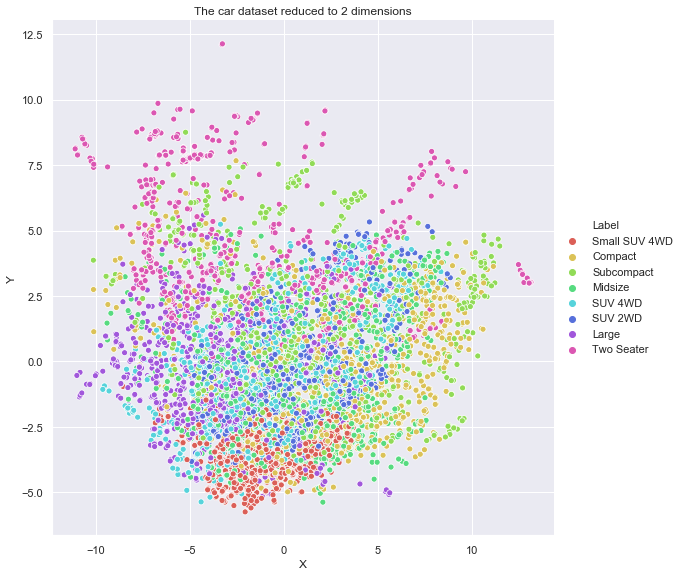

In [21]:
g = sns.relplot(data=df, x='X', y='Y', hue='Label', palette=sns.color_palette("hls", 8), alpha=1, height=8)
title = plt.title('The car dataset reduced to 2 dimensions')
plt.show()

Now this is absolutely fascinating. The algorithm seems to have understood that the main dimension relates to size. As you can see, yellow is on top, next to purple. These categories are two-seaters and subcompact. Going lower, there's purple with green, which are subcompact and compact. Then, in green lies the dark blue, which is midsize. Going further down, there is red, the smaller SUV, light blue (SUV 2WD), then at the bottom is the pink, which is a large SUV 4WD. That is mainly determined by the Y dimension. The X dimension is hard to interpret. 

### Let's do it in a category of three

In [22]:
X_2 = data.loc[:, ['Drivetrain', 'Passenger Capacity', 'Passenger Doors', 'Body Style',
       'EPA Classification', 'Front Shoulder Room (in)',
       'Front Head Room (in)', 'Second Leg Room (in)', 'Front Leg Room (in)',
       'Second Shoulder Room (in)', 'Second Head Room (in)',
       'Height, Overall (in)', 'Wheelbase (in)', 'Width, Max w/o mirrors (in)',
       'Fuel Tank Capacity, Approx (gal)', 'EPA Fuel Economy Est - Hwy (MPG)',
       'EPA Fuel Economy Est - City (MPG)', 'Fuel System',
       'Third Gear Ratio (:1)', 'First Gear Ratio (:1)',
       'Fourth Gear Ratio (:1)', 'Second Gear Ratio (:1)',
       'Front Brake Rotor Diam x Thickness (in)',
       'Rear Brake Rotor Diam x Thickness (in)', 'Steering Type',
       'Turning Diameter - Curb to Curb', 'Rear Wheel Material',
       'Suspension Type - Front', 'Air Bag-Frontal-Driver',
       'Air Bag-Frontal-Passenger', 'Air Bag-Passenger Switch (On/Off)',
       'Air Bag-Side Body-Front', 'Air Bag-Side Body-Rear',
       'Air Bag-Side Head-Front', 'Air Bag-Side Head-Rear', 'Brakes-ABS',
       'Child Safety Rear Door Locks', 'Daytime Running Lights',
       'Traction Control', 'Night Vision', 'Rollover Protection Bars',
       'Fog Lamps', 'Parking Aid', 'Tire Pressure Monitor', 'Back-Up Camera',
       'Stability Control', 'Other Features', 'Basic Miles/km', 'Basic Years',
       'Corrosion Miles/km', 'Corrosion Years', 'Drivetrain Miles/km',
       'Drivetrain Years', 'Roadside Assistance Miles/km',
       'Roadside Assistance Years', 'Hybrid Engine', 'Gears', 'Net Horsepower',
       'Net Horsepower RPM', 'Net Torque', 'Net Torque RPM', 'Cylinders',
       'Engine Configuration', 'Displacement (L)', 'Displacement (cc)',
       'Rear Tire Width', 'Front Tire Width', 'Rear Wheel Size',
       'Front Wheel Size', 'Tire Rating', 'Tire Width Ratio',
       'Wheel Size Ratio', 'Tire Ratio', 'Year', 'Country',
       'Category']]
X_2 = X_2.loc[X_2['Category'] != 'Van']

In [23]:
specs_to_dummies = ['Drivetrain', 'Fuel System', 'Steering Type', 'Rear Wheel Material',
                   'Suspension Type - Front', 'Engine Configuration', 'Tire Rating', 'Country']

for item in specs_to_dummies:
    dummies = pd.get_dummies(X_2[item], prefix_sep=': ', prefix=item)
    X_2 = X_2.drop(item, axis=1)
    X_2 = pd.concat([X_2, dummies], sort=False, axis=1)
X_2 = X_2.reset_index(drop=True)

specs_to_one_two = ['Air Bag-Frontal-Driver', 'Air Bag-Frontal-Passenger', 'Air Bag-Passenger Switch (On/Off)',
       'Air Bag-Side Body-Front', 'Air Bag-Side Body-Rear', 'Air Bag-Side Head-Front', 'Air Bag-Side Head-Rear', 
       'Brakes-ABS', 'Child Safety Rear Door Locks', 'Daytime Running Lights',
       'Traction Control', 'Night Vision', 'Rollover Protection Bars',
       'Fog Lamps', 'Parking Aid', 'Tire Pressure Monitor', 'Back-Up Camera',
       'Stability Control']

for item in specs_to_one_two:
    dummies = pd.get_dummies(X_2[item], prefix_sep=': ', prefix=item, drop_first=True)
    X_2 = X_2.drop(item, axis=1)
    X_2 = pd.concat([X_2, dummies], sort=False, axis=1)
X_2 = X_2.reset_index(drop=True)

X_2.drop(['Body Style', 'Other Features'], axis=1, inplace=True)

df_cat = X_2.copy()

X_2.drop(['Category', 'EPA Classification'], axis=1, inplace=True)

In [24]:
scaler_mm = MinMaxScaler()

x_2_minmax = scaler_mm.fit_transform(X_2)

In [25]:
scaler_std = StandardScaler()

x_2_std = scaler_std.fit_transform(X_2)

In [26]:
x_red = pca.fit_transform(x_2_std)

In [27]:
df_cat2 = pd.DataFrame(x_red, columns=['X', 'Y'])

In [28]:
df_cat2 = pd.concat([df_cat2, df_cat[['Category', 'EPA Classification']]], axis=1, sort=False)
df_cat2.head()

,X,Y,Category,EPA Classification
0,-6.247384,-7.512561,Pickup,None
1,2.279099,-4.054899,Pickup,None
2,2.474536,-2.199813,Car,Midsize Station Wagon
3,-0.432380,4.588272,SUV,None
4,4.205524,0.440737,SUV,Small SUV 2WD


In [29]:
df_cat2['Category'].value_counts()

Car       14085
SUV        8084
Pickup     8022
Name: Category, dtype: int64

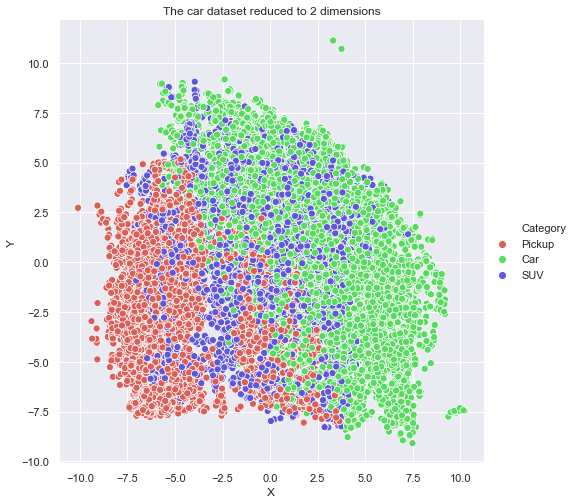

In [30]:
g = sns.relplot(data=df_cat2, x='X', y='Y', hue='Category', s=50, marker='o', 
                palette=sns.color_palette("hls", 3), alpha=1, height=7)
title = plt.title('The car dataset reduced to 2 dimensions')
plt.show()

The PCA algorithm is clearly differentiating between pickups, cars, and SUVs with the two dimensions

In [48]:
explained_variance_2 = pca.explained_variance_ratio_
explained_variance_2

array([0.06830609, 0.0513892 ])

In [49]:
print('The first factor accounts for %f%% of the variance, and the second one %f%%. ' \
    'Together, they sum up to %f%% of the variance.'%(explained_variance_2[0]*100, 
                                explained_variance_2[1]*100, sum(explained_variance_2*100)))

The first factor accounts for 6.830609% of the variance, and the second one 5.138920%, Together, they sum up to 11.969529% of the variance.


### Now with a three factor solution

In [31]:
pca_3 = PCA(n_components=3)
x3 = pca_3.fit_transform(x_2_std)
df = pd.DataFrame(x3, columns=['X', 'Y', 'Z'])
df = pd.concat([df, pd.Series(y)], axis=1, sort=False)

In [32]:
encoder = LabelEncoder()
encoder.fit_transform(y)

array([5, 0, 6, ..., 0, 7, 3], dtype=int64)

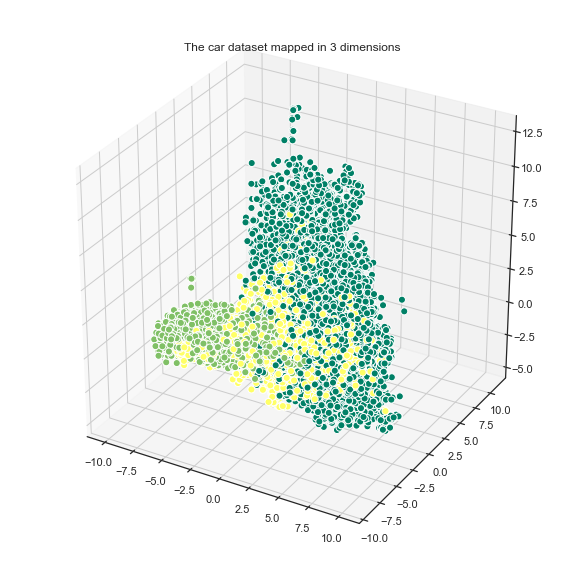

In [33]:
fig = plt.figure(figsize=(10, 10))
sns.set_style('white')
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x3[:, 0], x3[:, 1], x3[:, 2], c=encoder.fit_transform(df_cat2['Category']), cmap='summer',
          edgecolor='white', s=50, alpha=1)
ax.set_title('The car dataset mapped in 3 dimensions')
plt.show()

Again, we see that the 3d mapping of the 250+d differentiates between cars, pickups, and SUVs

In [50]:
explained_variance_3 = pca_3.explained_variance_ratio_
explained_variance_3

array([0.06830609, 0.0513892 , 0.0250357 ])

In [51]:
print('The first factor accounts for %f%% of the variance, the second one %f%%, ' \
    'and the third one %f%%. Together, they sum up to %f%% of the variance.'%(explained_variance_3[0]*100, 
                                explained_variance_3[1]*100, explained_variance_3[2]*100, 
                                sum(explained_variance_3*100)))

The first factor accounts for 6.830609% of the variance, the second one 5.138920%, and the third one 2.503570%. Together, they sum up to 14.473099% of the variance.


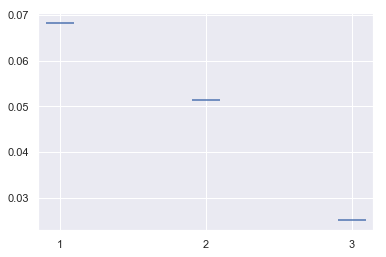

In [68]:
sns.set()
plt.scatter(np.arange(1, len(explained_variance_3)+1), explained_variance_3, 
            marker='_', s=800)
xticks = plt.xticks([1, 2, 3])
plt.title('Explained variance by dimension')